In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data Science\Data_Science_Class\Pandas\csv_data\car_price_prediction.csv')
df.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


In [3]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

# About Dataset
Assignment
Your notebooks must contain the following steps:

* Perform data cleaning and pre-processing.
  * What steps did you use in this process and how did you clean your data.
* Perform exploratory data analysis on the given dataset.
  * Explain each and every graphs that you make.
* Train a ml-model and evaluate it using different metrics.
  * Why did you choose that particular model? What was the accuracy?
* Hyperparameter optimization and feature selection is a plus.
* Model deployment and use of ml-flow is a plus.
* Perform model interpretation and show feature importance for your model.
  * Provide some explanation for the above point.
Future steps.

# Data profiling and Inspection

In [4]:
df.shape

(19237, 18)

* In this dataset have 19237 rows and 18 columns.

In [5]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


* Max price 2.630750e+07.
* min price 1.000000e+00.
* mean price 1.855593e+04.
* 25% price  5.331000e+03.
* 50% price  1.317200e+04.
* 75% price  2.207500e+04.

In [6]:
df.describe(include=object)

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237,19237
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5819,3769,1083,8736,13954,10150,3916,721,13514,12874,18332,17753,5033


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

* In this dataset has 0 missing values.

# Data Cleaning:
* Handling Missing Values:
  * Identify and fill in or remove missing values.
* Duplicates:
  * Check for and remove duplicate entries.
* Outliers:
  * Identify and address outliers that might skew the data.

  

In [8]:
df[df.duplicated()]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
425,45815372,7840,-,MERCEDES-BENZ,E 200,1998,Sedan,No,CNG,2,180003 km,4.0,Manual,Rear,04-May,Left wheel,Black,4
1581,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
1697,45732125,18503,-,TOYOTA,Prius,2010,Sedan,No,Petrol,1.8,162000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,12
1972,45507765,20385,-,MERCEDES-BENZ,CLS 500,2005,Sedan,Yes,Petrol,5,230000 km,8.0,Tiptronic,Rear,04-May,Left wheel,Silver,10
2131,45815363,8781,-,TOYOTA,Ist,2002,Hatchback,No,Petrol,1.5,117000 km,4.0,Automatic,4x4,04-May,Right-hand drive,Red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18974,45815465,2352,1273,LEXUS,IS 350,2015,Sedan,Yes,Petrol,3.5,80856 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12
19137,45810466,15125,642,CHEVROLET,Orlando,2012,Jeep,Yes,Diesel,2,156834 km,4.0,Automatic,Front,04-May,Left wheel,Golden,4
19200,45725908,36065,640,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,Yes,Petrol,2.0 Turbo,68000 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,12
19203,45761487,13485,645,TOYOTA,Prius,2011,Sedan,No,Hybrid,1.8,281600 km,6.0,Automatic,Front,04-May,Left wheel,Grey,8


* In this dataset 313 has an duplicated values

so, we can remove the duplicate rows if every rows of the column has an duplicate.

In [9]:
df.drop_duplicates(subset=['Price','Levy','Manufacturer','Model','Category','Fuel type','Mileage','Cylinders','Levy','Gear box type',	'Drive wheels','Gear box type','Doors',	'Wheel','Color','Airbags'],keep='last',inplace=True)

In [10]:
df.duplicated().sum()

0

# Data preprocessing & Handling missing values

In [11]:
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [12]:
df.sample(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
3752,45451220,9408,642,DODGE,Caliber,2012,Hatchback,No,Petrol,2,133000 km,4.0,Automatic,Front,04-May,Left wheel,Grey,8
2861,45803097,38894,640,HYUNDAI,Santa FE,2013,Jeep,Yes,Diesel,2,128919 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
10675,44946166,13172,-,HYUNDAI,Accent,2011,Sedan,No,Petrol,1.6,109000 km,4.0,Tiptronic,Front,04-May,Left wheel,Silver,4


* In this dataset has an no missing values.But there are some  Levy column has '-' this data.

so, We are replace '-' with 0 and transform the column to float

In [13]:
df['Levy']=df['Levy'].replace('-','0').astype('float')

In [14]:
df.sample(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1530,45776538,6899,0.0,SUBARU,Legacy,2004,Sedan,No,Petrol,2.0 Turbo,101000 km,4.0,Tiptronic,4x4,04-May,Right-hand drive,Silver,6
9096,45732854,9252,765.0,HYUNDAI,Sonata,2015,Sedan,Yes,LPG,2,603446 km,4.0,Automatic,Front,04-May,Left wheel,Orange,4
16646,45796646,6125,1282.0,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,75152 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


*  Replace "km" with "" and transform the column to float

In [15]:

df['Mileage']= df['Mileage'].str.replace('km',"").astype("float")

In [16]:
# not important columns to out model (ID,DOORS.prod year)
df.drop(columns=['ID',"Doors",'Prod. year'],inplace=True)

In [17]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,Right-hand drive,Black,2
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,Left wheel,Silver,4
5,39493,891.0,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2,160931.0,4.0,Automatic,Front,Left wheel,White,4
9,26657,0.0,LEXUS,RX 350,Jeep,Yes,Petrol,3.5,128500.0,6.0,Automatic,4x4,Left wheel,Silver,12
11,8781,0.0,FORD,Transit,Microbus,No,CNG,4,0.0,8.0,Manual,Rear,Left wheel,Blue,0


Engine Volume 
 * we need to strip the 'Turbo' world in them , and convert it's type to float

In [18]:
# Replacing 'Turbo' 
df['Engine volume'] = df['Engine volume'].str.replace('Turbo','')

In [19]:
df = df.reset_index(drop=True)

In [20]:
df.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
0,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,Right-hand drive,Black,2
1,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,Left wheel,Silver,4
2,39493,891.0,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2,160931.0,4.0,Automatic,Front,Left wheel,White,4
3,26657,0.0,LEXUS,RX 350,Jeep,Yes,Petrol,3.5,128500.0,6.0,Automatic,4x4,Left wheel,Silver,12
4,8781,0.0,FORD,Transit,Microbus,No,CNG,4,0.0,8.0,Manual,Rear,Left wheel,Blue,0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15707 entries, 0 to 15706
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15707 non-null  int64  
 1   Levy              15707 non-null  float64
 2   Manufacturer      15707 non-null  object 
 3   Model             15707 non-null  object 
 4   Category          15707 non-null  object 
 5   Leather interior  15707 non-null  object 
 6   Fuel type         15707 non-null  object 
 7   Engine volume     15707 non-null  object 
 8   Mileage           15707 non-null  float64
 9   Cylinders         15707 non-null  float64
 10  Gear box type     15707 non-null  object 
 11  Drive wheels      15707 non-null  object 
 12  Wheel             15707 non-null  object 
 13  Color             15707 non-null  object 
 14  Airbags           15707 non-null  int64  
dtypes: float64(3), int64(2), object(10)
memory usage: 1.8+ MB


In [22]:
# extract numerical data
numerical_data = df.select_dtypes(include='number')
numerical_data.head()

,Price,Levy,Mileage,Cylinders,Airbags
0,8467,0.0,200000.0,4.0,2
1,11726,446.0,91901.0,4.0,4
2,39493,891.0,160931.0,4.0,4
3,26657,0.0,128500.0,6.0,12
4,8781,0.0,0.0,8.0,0


In [45]:
# Categorical data
categorical_data = df.select_dtypes(include='object')
categorical_data.sample(3)

,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Gear box type,Drive wheels,Wheel,Color
6506,HYUNDAI,Santa FE,Jeep,Yes,Diesel,2,Automatic,Front,Left wheel,White
11258,KIA,Optima,Sedan,Yes,Petrol,2,Tiptronic,Front,Left wheel,Blue
14375,HONDA,FIT,Hatchback,No,Petrol,1.3,Automatic,Front,Right-hand drive,Silver


# Handling Outliers

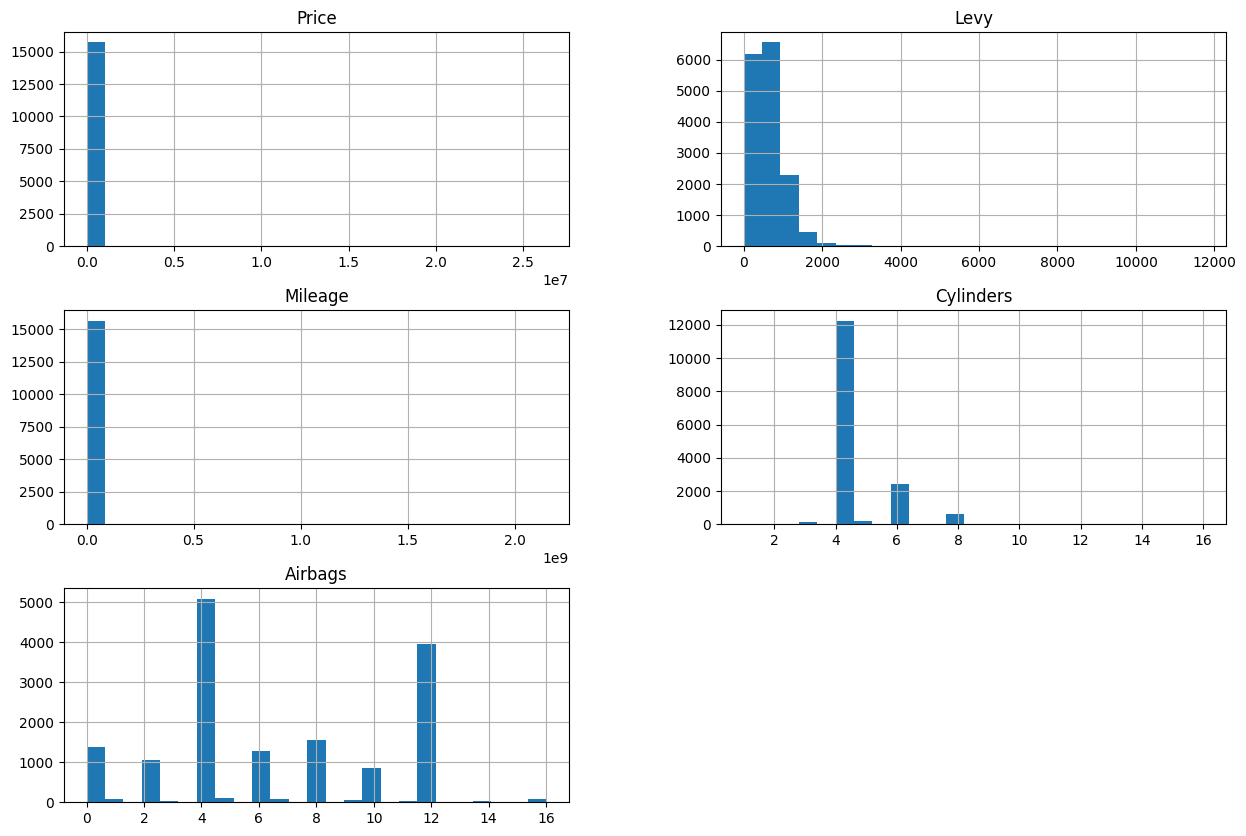

In [24]:
df.hist(bins=25,figsize=(15,10))
plt.show()

<Axes: xlabel='Cylinders', ylabel='Density'>

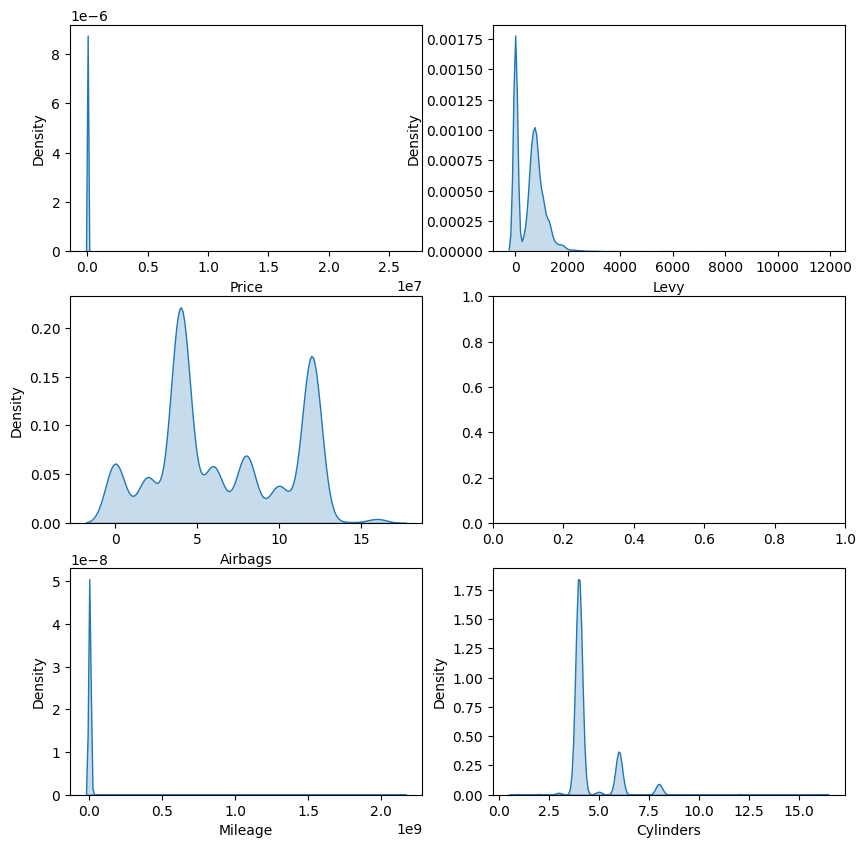

In [25]:
fig, axes = plt.subplots(3,2, figsize=(10,10))
sns.kdeplot(numerical_data['Price'],fill=True,ax=axes[0,0])
sns.kdeplot(numerical_data['Levy'],fill=True,ax=axes[0,1])
sns.kdeplot(numerical_data['Airbags'],fill=True,ax=axes[1,0])

sns.kdeplot(numerical_data['Mileage'],fill=True,ax=axes[2,0])
sns.kdeplot(df['Cylinders'],fill=True,ax=axes[2,1])

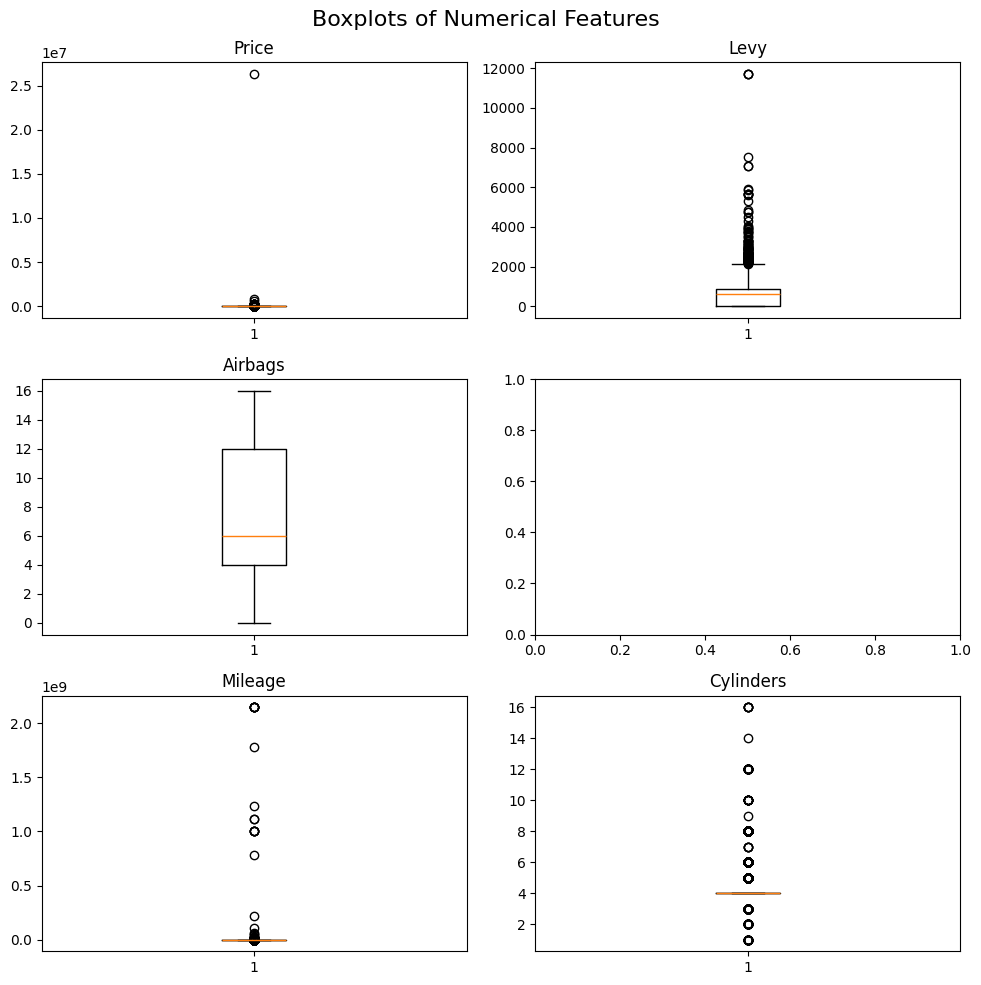

In [26]:
fig, axes = plt.subplots(3,2,figsize=(10,10))
axes[0,0].boxplot(numerical_data['Price'])
axes[0,1].boxplot(numerical_data['Levy'])
axes[1,0].boxplot(numerical_data['Airbags'])

axes[2,0].boxplot(numerical_data['Mileage'])
axes[2,1].boxplot(numerical_data['Cylinders'])

axes[0,0].set_title('Price')
axes[0,1].set_title('Levy')
axes[1,0].set_title('Airbags')

axes[2,0].set_title('Mileage')
axes[2,1].set_title('Cylinders')

plt.suptitle("Boxplots of Numerical Features",fontsize=16)
plt.tight_layout()
plt.show()


In [28]:
fule_data = df['Fuel type'].value_counts()
fule_data

Fuel type
Petrol            8808
Diesel            3209
Hybrid            2422
LPG                714
CNG                468
Plug-in Hybrid      85
Hydrogen             1
Name: count, dtype: int64

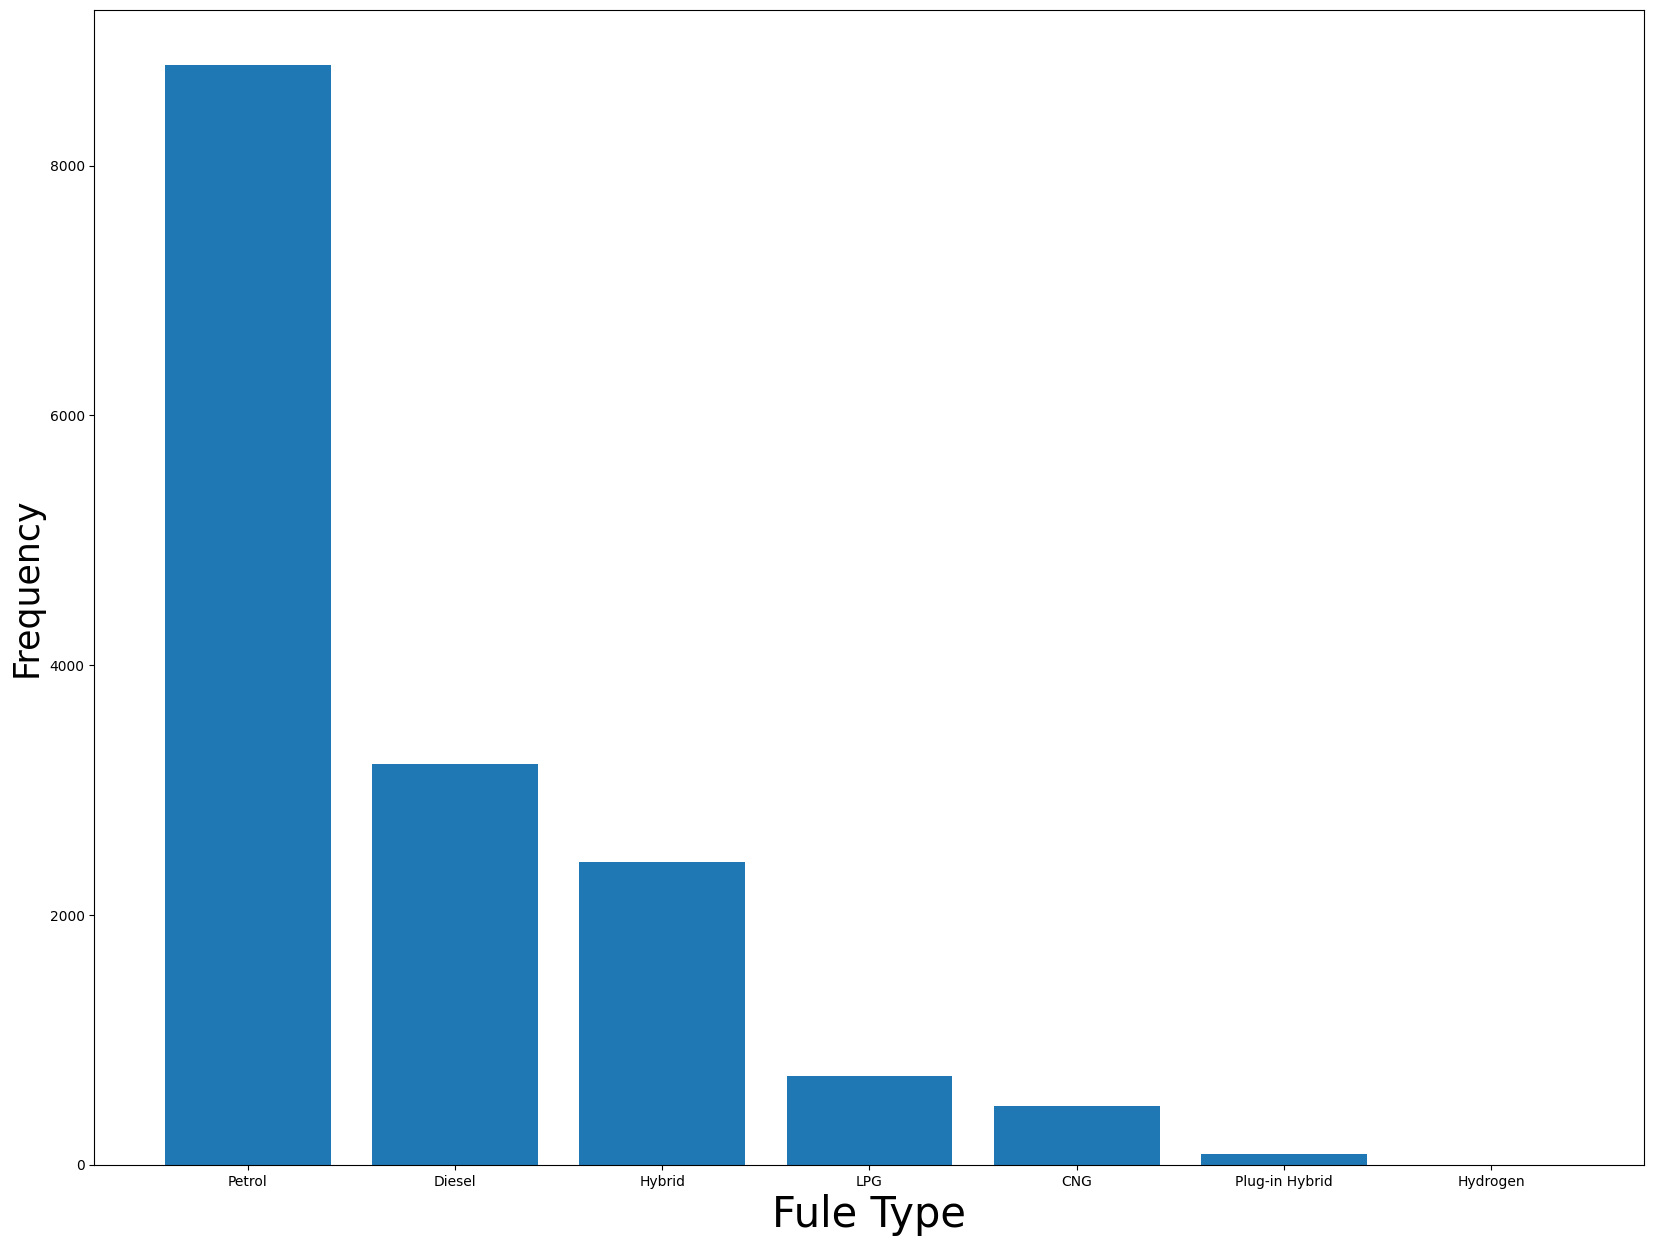

In [29]:
plt.figure(figsize=(20,15))
plt.bar(x=fule_data.index,height=fule_data.values)
plt.xlabel("Fule Type",fontsize=30)
plt.ylabel("Frequency",fontsize=25)
plt.show()

* In this dataset fult type petrol car are maximum & Hydrogen car are minumum.


plot the Category countplot 

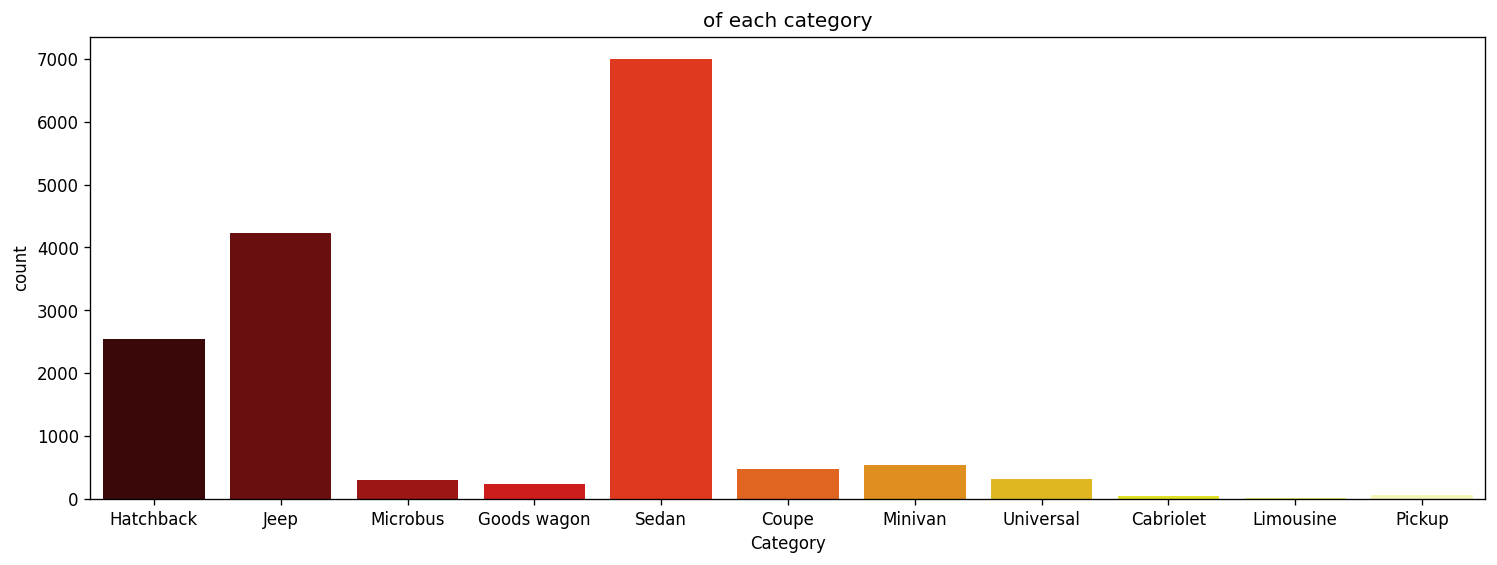

In [34]:
plt.figure(figsize=(15,5),dpi=120)
sns.countplot(data=df,x = df['Category'],hue='Category',palette='hot')
plt.title("of each category")
plt.show()

* Most types of Categories are Sedan, Hatchback and jeep.

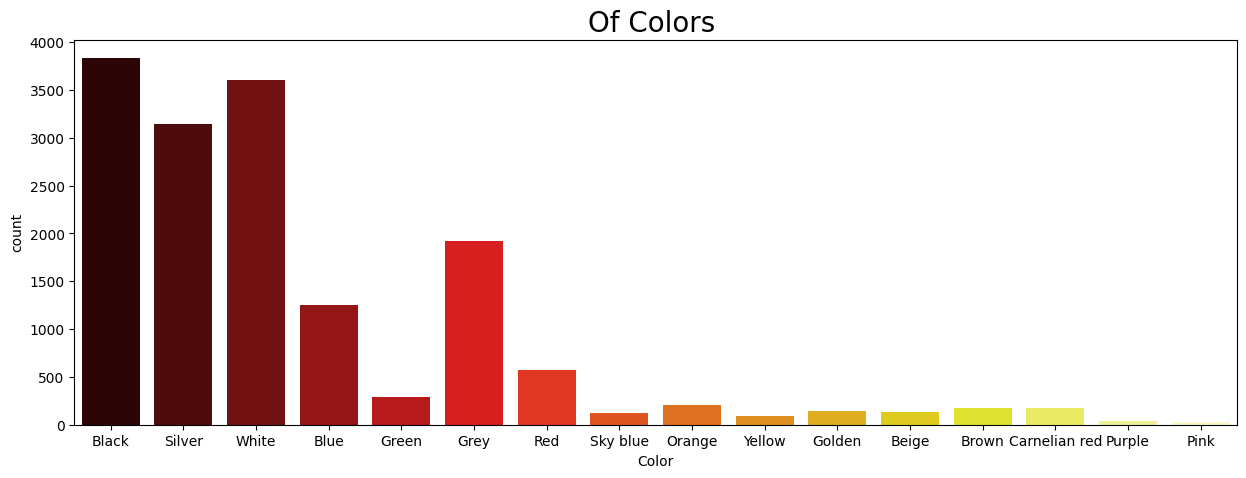

In [35]:
# plot the color 
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='Color',hue='Color',palette='hot')
plt.title('Of Colors ',fontsize = 20)
plt.show()

* the most sold car colors are Black,white,silver and Gray

In [36]:
top_10_cars = df.Manufacturer.value_counts().sort_values(ascending=False)[:10]
top_10_cars

Manufacturer
HYUNDAI          3050
TOYOTA           2859
MERCEDES-BENZ    1450
CHEVROLET         968
FORD              956
BMW               924
HONDA             870
NISSAN            593
VOLKSWAGEN        556
LEXUS             421
Name: count, dtype: int64

# Check the average price by each columns

In [70]:
average_price_by_manufacture=df.groupby('Manufacturer')['Price'].mean()[::5] # extract the using Systematic random sampling
average_price_by_manufacture

Manufacturer
ACURA        5910.933333
BMW         22148.779221
CITROEN     10640.444444
FIAT        11335.223684
HAVAL       15053.000000
ISUZU        9643.500000
LANCIA      12231.000000
MAZDA       11587.148936
MOSKVICH     4609.000000
PORSCHE     48406.692308
SATURN      13799.000000
SUBARU      10895.513274
VAZ          4659.893617
Name: Price, dtype: float64

In [130]:
average_price_by_Color = df.groupby('Color')['Price'].mean()
average_price_by_Color

Color
Beige            15627.559701
Black            21333.508740
Blue             36738.183641
Brown            20915.830409
Carnelian red    15908.887006
Golden           14608.133803
Green            10307.618056
Grey             21206.758729
Orange           13692.019608
Pink             10598.360000
Purple            8837.384615
Red              14442.068783
Silver           15596.714877
Sky blue         14079.000000
White            20219.912923
Yellow           19535.968085
Name: Price, dtype: float64

In [77]:
average_price_by_fuel_type = df.groupby('Fuel type')['Price'].mean()
average_price_by_fuel_type

Fuel type
CNG                8187.600427
Diesel            34550.382050
Hybrid            14086.913295
Hydrogen          20385.000000
LPG               13328.743697
Petrol            17989.985014
Plug-in Hybrid    23650.917647
Name: Price, dtype: float64

In [88]:
average_price_by_whell = df.groupby('Wheel')['Price'].mean()
average_price_by_whell

Wheel
Left wheel          21414.356593
Right-hand drive     9060.869626
Name: Price, dtype: float64

In [90]:
average_price_by_Gare_box_type = df.groupby('Gear box type')['Price'].mean()
average_price_by_Gare_box_type

Gear box type
Automatic    17849.316620
Manual       25879.313757
Tiptronic    26319.100196
Variator     14772.681694
Name: Price, dtype: float64

In [89]:
average_price_by_Drive_wheel = df.groupby('Drive wheels')['Price'].mean()
average_price_by_Drive_wheel

Drive wheels
4x4      23309.424385
Front    19828.792620
Rear     18687.730183
Name: Price, dtype: float64

In [85]:
average_price_by_Airbags = df.groupby('Airbags')['Price'].mean()
average_price_by_Airbags

Airbags
0     33241.994257
1     10890.618421
2     10425.386819
3      8726.216216
4     22828.017682
5     10936.730769
6     15688.590521
7     16521.129412
8     18412.118850
9     20001.016129
10    22987.075740
11    17538.939394
12    16959.712446
13     6284.500000
14    26659.400000
15    39201.428571
16    37318.741935
Name: Price, dtype: float64

In [84]:
average_price_by_Category = df.groupby('Category')['Price'].mean()
average_price_by_Category

Category
Cabriolet       24407.971429
Coupe           22169.512605
Goods wagon    124840.104803
Hatchback       12194.585799
Jeep            26823.112716
Limousine       11534.454545
Microbus        18458.064407
Minivan         19124.661049
Pickup          29362.392157
Sedan           15716.120166
Universal       23273.816720
Name: Price, dtype: float64

In [83]:
average_price_by_cylinders =df.groupby('Cylinders')['Price'].mean()
average_price_by_cylinders

Cylinders
1.0     16751.810811
2.0     10358.404762
3.0      9879.093458
4.0     19789.640434
5.0     14972.793939
6.0     20336.652389
7.0      6446.500000
8.0     33363.333884
9.0      2800.000000
10.0    31486.666667
12.0    39757.131579
14.0    15681.000000
16.0    17519.800000
Name: Price, dtype: float64

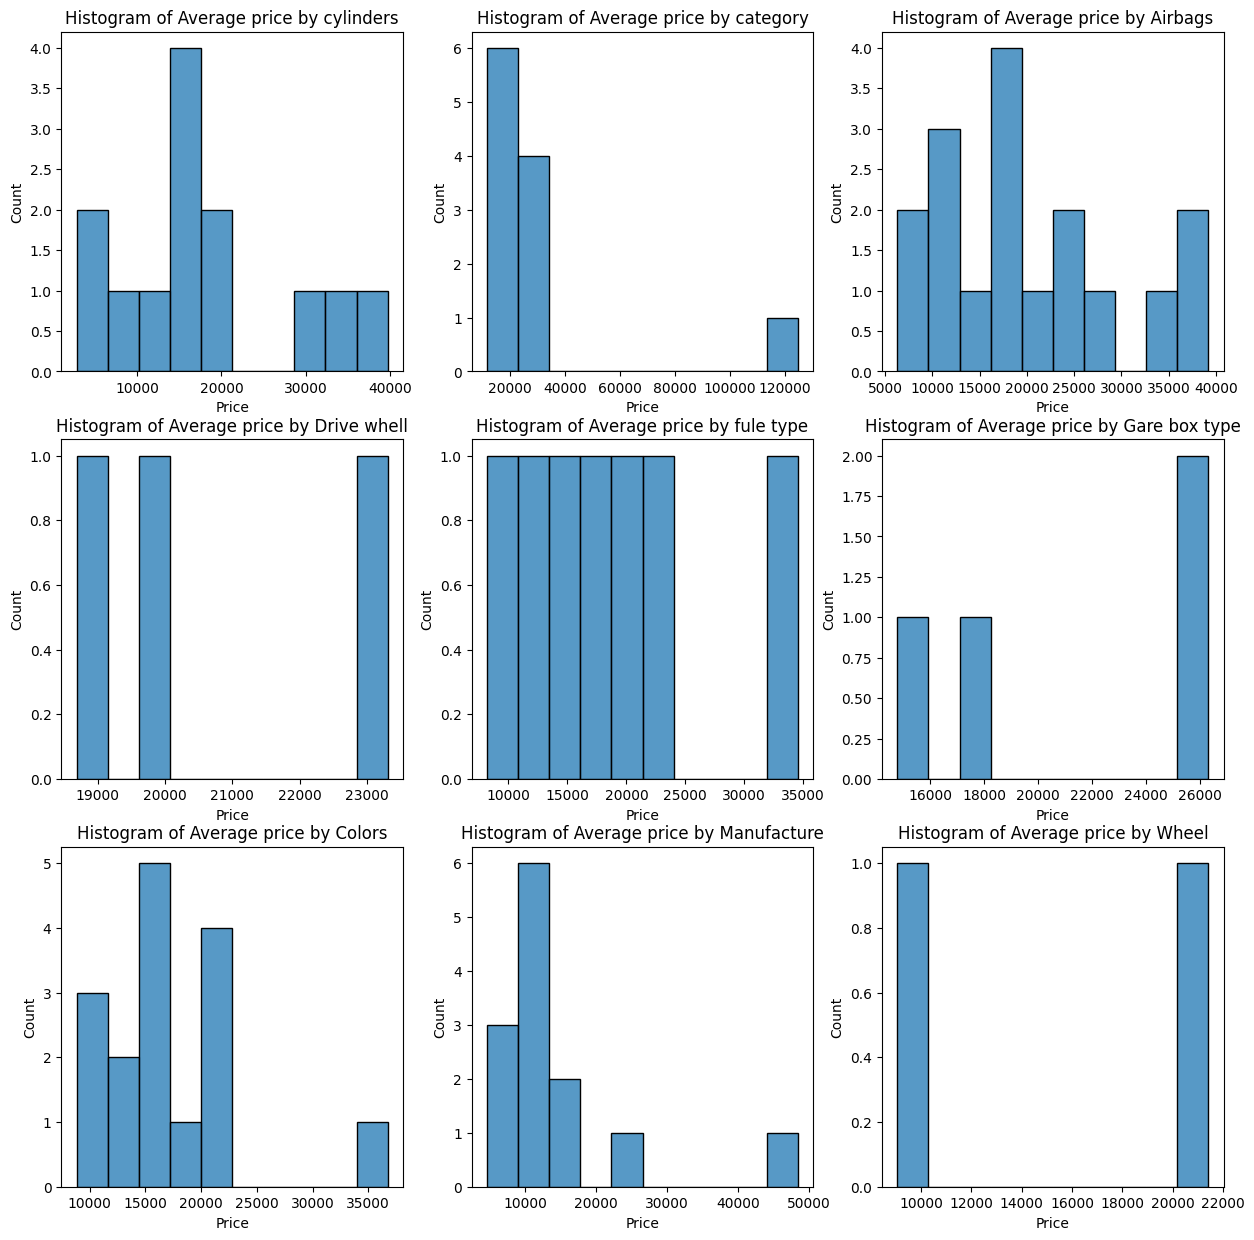

In [140]:
fig,axes = plt.subplots(3,3,figsize = (15,15))
sns.histplot(average_price_by_cylinders,bins=10,ax=axes[0,0])
sns.histplot(average_price_by_Category,bins=10,ax=axes[0,1])
sns.histplot(average_price_by_Airbags,bins=10,ax=axes[0,2])

sns.histplot(average_price_by_Drive_wheel,bins=10,ax=axes[1,0])
sns.histplot(average_price_by_fuel_type,bins=10,ax=axes[1,1])
sns.histplot(average_price_by_Gare_box_type,bins=10,ax=axes[1,2])

sns.histplot(average_price_by_Color,bins=10,ax=axes[2,0])
sns.histplot(average_price_by_manufacture,bins=10,ax=axes[2,1])
sns.histplot(average_price_by_whell,bins=10,ax=axes[2,2])

axes[0,0].set_title("Histogram of Average price by cylinders")
axes[0,1].set_title("Histogram of Average price by category")
axes[0,2].set_title("Histogram of Average price by Airbags")

axes[1,0].set_title("Histogram of Average price by Drive whell")
axes[1,1].set_title("Histogram of Average price by fule type")
axes[1,2].set_title("Histogram of Average price by Gare box type")

axes[2,0].set_title("Histogram of Average price by Colors")
axes[2,1].set_title("Histogram of Average price by Manufacture")
axes[2,2].set_title("Histogram of Average price by Wheel")

plt.show()


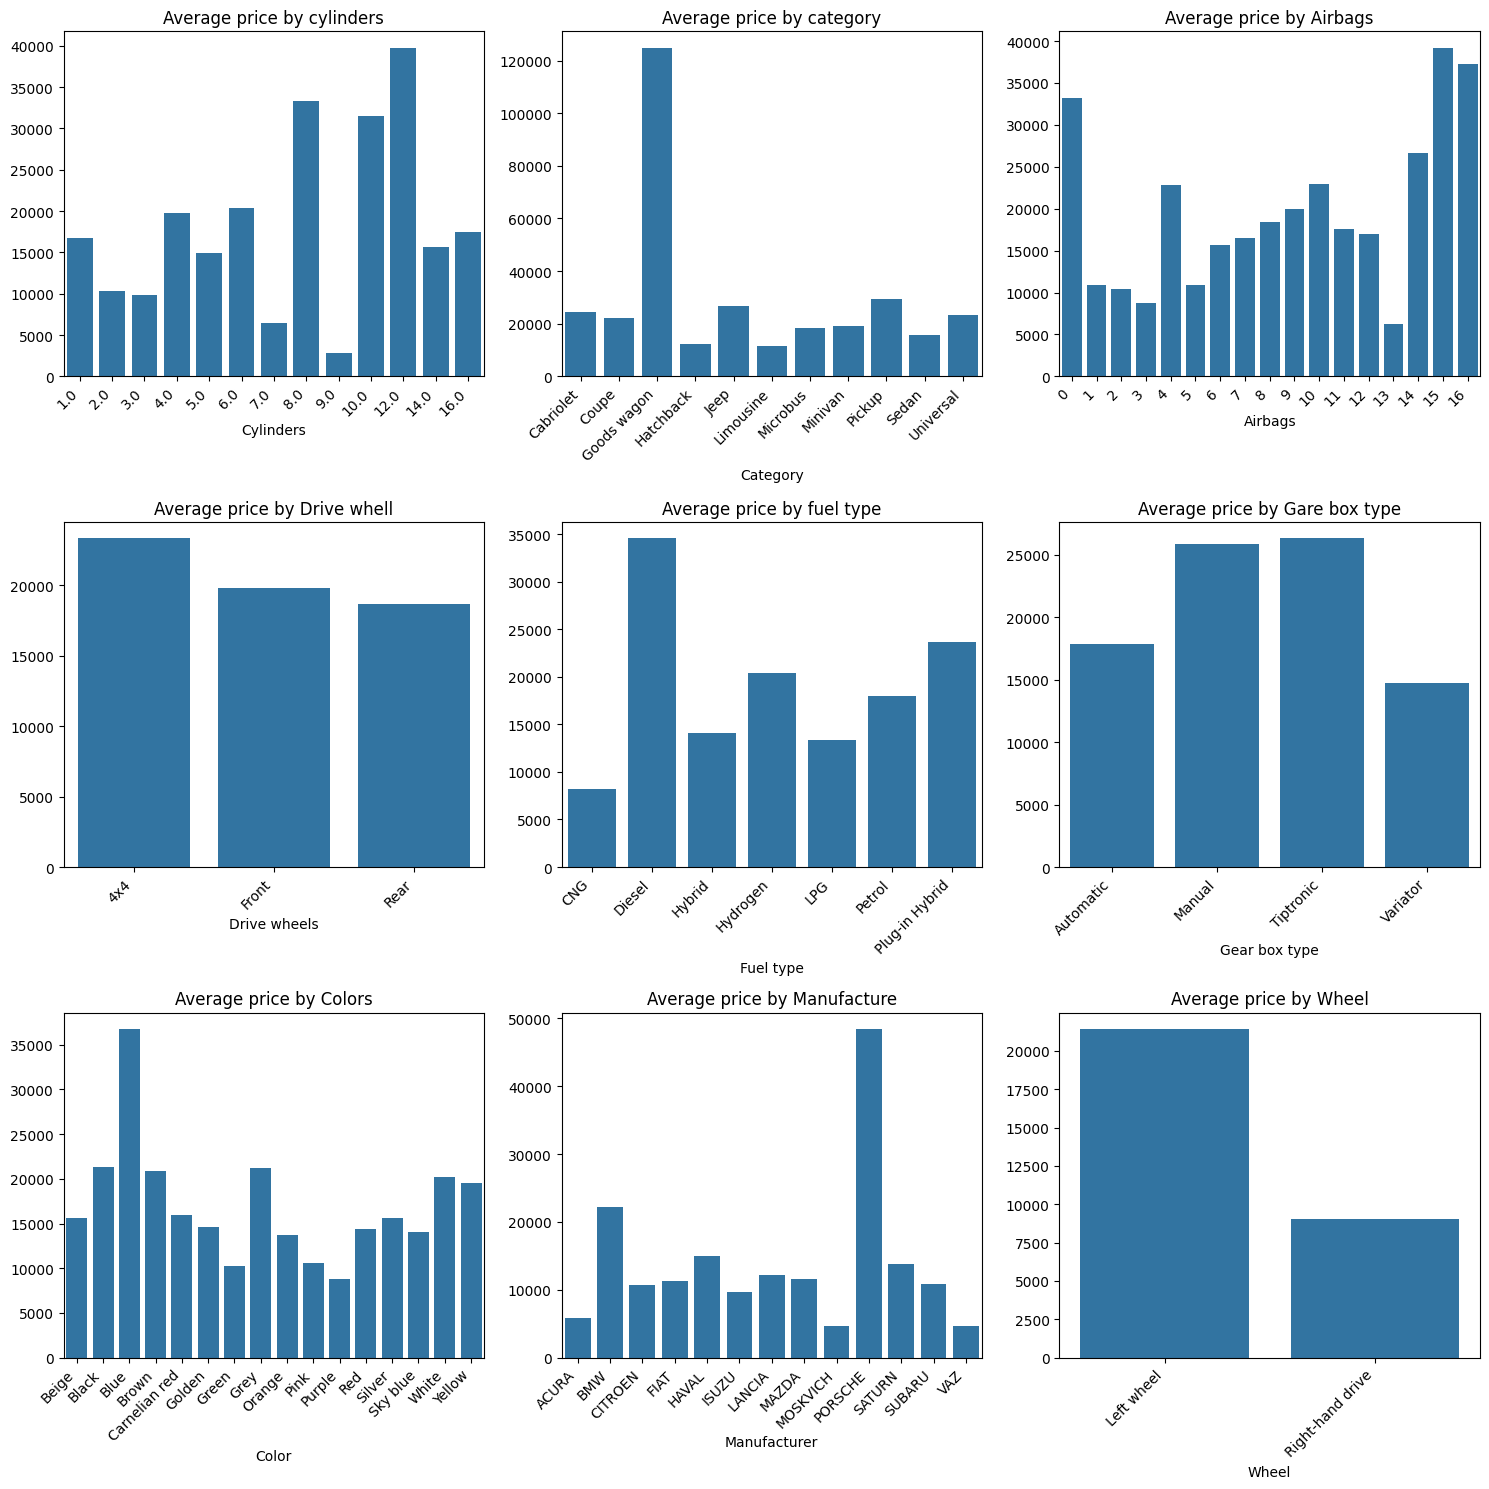

In [152]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
sns.barplot(x=average_price_by_cylinders.index, y=average_price_by_cylinders.values, ax=axes[0, 0])
sns.barplot(x=average_price_by_Category.index, y=average_price_by_Category.values, ax=axes[0, 1])
sns.barplot(x=average_price_by_Airbags.index, y=average_price_by_Airbags.values, ax=axes[0, 2])

sns.barplot(x=average_price_by_Drive_wheel.index, y=average_price_by_Drive_wheel.values, ax=axes[1, 0])
sns.barplot(x=average_price_by_fuel_type.index, y=average_price_by_fuel_type.values, ax=axes[1, 1])
sns.barplot(x=average_price_by_Gare_box_type.index, y=average_price_by_Gare_box_type.values, ax=axes[1, 2])

sns.barplot(x=average_price_by_Color.index, y=average_price_by_Color.values, ax=axes[2, 0])
sns.barplot(x=average_price_by_manufacture.index, y=average_price_by_manufacture.values, ax=axes[2, 1])
sns.barplot(x=average_price_by_whell.index, y=average_price_by_whell.values, ax=axes[2, 2])

axes[0, 0].set_title("Average price by cylinders")
axes[0, 1].set_title("Average price by category")
axes[0, 2].set_title("Average price by Airbags")

axes[1, 0].set_title("Average price by Drive whell")
axes[1, 1].set_title("Average price by fuel type")
axes[1, 2].set_title("Average price by Gare box type")

axes[2, 0].set_title("Average price by Colors")
axes[2, 1].set_title("Average price by Manufacture")
axes[2, 2].set_title("Average price by Wheel")

axes[0, 0].set_xticks(range(len(average_price_by_cylinders.index)))
axes[0, 0].set_xticklabels(average_price_by_cylinders.index, rotation=45, ha='right')

axes[0, 1].set_xticks(range(len(average_price_by_Category.index)))
axes[0, 1].set_xticklabels(average_price_by_Category.index, rotation=45, ha='right')

axes[0, 2].set_xticks(range(len(average_price_by_Airbags.index)))
axes[0, 2].set_xticklabels(average_price_by_Airbags.index, rotation=45, ha='right')

axes[1, 0].set_xticks(range(len(average_price_by_Drive_wheel.index)))
axes[1, 0].set_xticklabels(average_price_by_Drive_wheel.index, rotation=45, ha='right')
axes[1, 1].set_xticks(range(len(average_price_by_fuel_type.index)))
axes[1, 1].set_xticklabels(average_price_by_fuel_type.index, rotation=45, ha='right')
axes[1, 2].set_xticks(range(len(average_price_by_Gare_box_type.index)))
axes[1, 2].set_xticklabels(average_price_by_Gare_box_type.index, rotation=45, ha='right')

axes[2, 0].set_xticks(range(len(average_price_by_Color.index)))
axes[2, 0].set_xticklabels(average_price_by_Color.index, rotation=45, ha='right')

axes[2, 1].set_xticks(range(len(average_price_by_manufacture.index)))
axes[2, 1].set_xticklabels(average_price_by_manufacture.index, rotation=45, ha='right')
axes[2, 2].set_xticks(range(len(average_price_by_whell.index)))
axes[2, 2].set_xticklabels(average_price_by_whell.index, rotation=45, ha='right')


plt.tight_layout()
plt.show()


This figure shows,
* High average price is Categorys(> 120000), Manufacture (50000), Cylinders (40000),color(35000)

So, We use 4 independent variable:
  * Categorys
  * Manufacture
  * cylinders
  * Colors


# Feature selection

* Dependent variable: price(y)
* Independent vairable: colors, Manufacture,Cylinders,Category etc


In [38]:
df.corr(numeric_only=True)

,Price,Levy,Mileage,Cylinders,Airbags
Price,1.000000,0.000479,-0.002014,0.010520,-0.010833
Levy,0.000479,1.000000,-0.019766,0.093798,0.138077
Mileage,-0.002014,-0.019766,1.000000,0.000567,-0.010545
Cylinders,0.010520,0.093798,0.000567,1.000000,0.232004
Airbags,-0.010833,0.138077,-0.010545,0.232004,1.000000


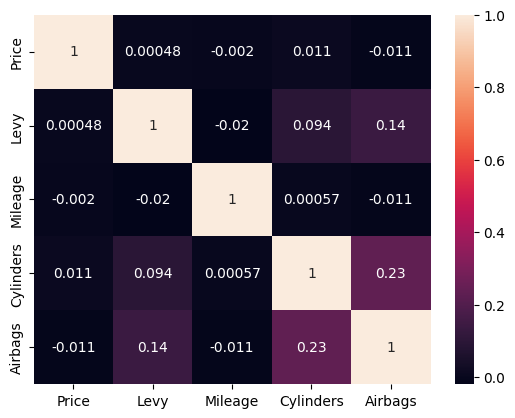

In [40]:
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()


* this figure shows high correlation of price with Cylinders.

so Here, we can use the Cylinders as an independent variable.

In [153]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [172]:
y = df[['Price']]
x = df[['Color','Manufacturer','Cylinders','Category']]


In [173]:
y.head()

,Price
0,8467
1,11726
2,39493
3,26657
4,8781


In [174]:
x.head()

,Color,Manufacturer,Cylinders,Category
0,Black,HONDA,4.0,Hatchback
1,Silver,HONDA,4.0,Hatchback
2,White,HYUNDAI,4.0,Jeep
3,Silver,LEXUS,6.0,Jeep
4,Blue,FORD,8.0,Microbus


In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [176]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()